In [2]:
import numpy as np
import pandas as pd
import random


# Задача регрессии

In [3]:
def f(x):
    return x * x

In [4]:
n = 10
data = pd.DataFrame({
    "y": np.array(range(n)),
    "x": f(np.array(range(n))),
    # "x2": f(np.array(range(n)))/2,
    # "b": 1,
})[["x", "y"]]
data

,x,y
0,0,0
1,1,1
2,4,2
3,9,3
4,16,4
5,25,5
6,36,6
7,49,7
8,64,8
9,81,9


In [5]:
for el in data.values:
    print((el[:-1][None, ...], el[-1][None, ...]))

(array([[0]]), array([0]))
(array([[1]]), array([1]))
(array([[4]]), array([2]))
(array([[9]]), array([3]))
(array([[16]]), array([4]))
(array([[25]]), array([5]))
(array([[36]]), array([6]))
(array([[49]]), array([7]))
(array([[64]]), array([8]))
(array([[81]]), array([9]))


In [6]:
dataset = [(el[:-1][None, ...], el[-1][None, ...]) for el in data.values]
# dataset = [(el[:-1], el[-1]) for el in data.values]

In [31]:
dataset[0][0].flatten()

array([81])

x: [[ 4]
 [49]]
y: [[2]
 [7]]
W1: [[0.33478047 0.50304111 0.79364081]]
b1: [[-0.86557642 -0.11923166  0.97370094]]
W2: [[-0.57344446  0.0544759 ]
 [ 0.08214788  0.44530717]
 [ 0.05134     0.52146506]]
b2: [[-0.5262053   0.54038257]]
W3: [[-0.10105692]
 [ 0.33460771]]
b3: [[0.06889343]]
t1: [[ 0.47354547  1.89293279  4.14826419]
 [15.53866667 24.52978289 39.86210072]]
h1: [[0.23244515 0.73817913 0.9689074 ]
 [0.99999964 1.         1.        ]]
t2: [[-0.54911613  1.38701304]
 [-0.96616168  1.56163068]]
h2: [[-0.26786101  0.60022993]
 [-0.44870756  0.65317444]]
t3: [[0.2968042 ]
 [0.33279564]]
z: [[0.2968042 ]
 [0.33279564]]
E: 47.35248990418257
dE_dt3: [[-1.7031958 ]
 [-6.66720436]]
dE_dW3: [[ 3.44784471]
 [-5.37715656]]
dE_db3: [[-8.37040016]]
dE_dh2: [[ 0.17211972 -0.56990245]
 [ 0.67376714 -2.23089799]]
dE_dt2: [[-0.05845367 -0.13675035]
 [-0.43797965 -0.50538226]]
dE_dW2: [[-0.45156676 -0.53716903]
 [-0.48112893 -0.60632851]
 [-0.49461584 -0.63788068]]
dE_db2: [[-0.49643332 -0.642132

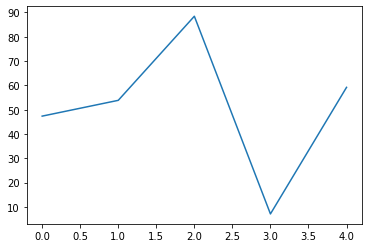

In [54]:
import random
import numpy as np

INPUT_DIM = 1
H1_DIM = 3
H2_DIM = 2
OUT_DIM = 1

def F(x):
    return 2/(1 + np.exp(-x)) - 1

def L(y_true, y_pred):
    return (y_true - y_pred)**2

def F_deriv(x):
    return F(x)*(1 - F(x))


W1 = np.random.rand(INPUT_DIM, H1_DIM)
b1 = np.random.rand(1, H1_DIM)
W2 = np.random.rand(H1_DIM, H2_DIM)
b2 = np.random.rand(1, H2_DIM)
W3 = np.random.rand(H2_DIM, OUT_DIM)
b3 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H1_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H1_DIM)
W3 = (W3 - 0.5) * 2 * np.sqrt(1/H2_DIM)
b3 = (b3 - 0.5) * 2 * np.sqrt(1/H2_DIM)

ALPHA = 0.0002
NUM_EPOCHS = 1 # 400
BATCH_SIZE = 2

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i * BATCH_SIZE : i * BATCH_SIZE + BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)
#         print(f"x: {x}")
#         print(f"y: {y}")
#         print(f"W1: {W1}")
#         print(f"b1: {b1}")
#         print(f"W2: {W2}")
#         print(f"b2: {b2}")
#         print(f"W3: {W3}")
#         print(f"b3: {b3}")
        # Forward
        t1 = x @ W1 + b1
#         print(f"t1: {t1}")
        h1 = F(t1)
#         print(f"h1: {h1}")
        t2 = h1 @ W2 + b2
#         print(f"t2: {t2}")
        h2 = F(t2)
#         print(f"h2: {h2}")
        t3 = h2 @ W3 + b3
#         print(f"t3: {t3}")
        # z = softmax_batch(t2)
        # z = t3.flatten()
        z = t3
#         print(f"z: {z}")
        E = np.sum(L(z, y))
#         print(f"E: {E}")

        # Backward
        # y_full = to_full_batch(y, OUT_DIM)
        # dE_dt2 = z - y_full
        dE_dt3 = z - y
#         print(f"dE_dt3: {dE_dt3}")
        dE_dW3 = h2.T @ dE_dt3
#         print(f"dE_dW3: {dE_dW3}")
        dE_db3 = np.sum(dE_dt3, axis=0, keepdims=True)
#         print(f"dE_db3: {dE_db3}")
        
        dE_dh2 = dE_dt3 @ W3.T
#         print(f"dE_dh2: {dE_dh2}")
        dE_dt2 = dE_dh2 * F_deriv(t2)
#         print(f"dE_dt2: {dE_dt2}")
        dE_dW2 = h1.T @ dE_dt2
#         print(f"dE_dW2: {dE_dW2}")
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
#         print(f"dE_db2: {dE_db2}")

        
        dE_dh1 = dE_dt2 @ W2.T
#         print(f"dE_dh1: {dE_dh1}")
        dE_dt1 = dE_dh1 * F_deriv(t1)
#         print(f"dE_dt1: {dE_dt1}")
        dE_dW1 = x.T @ dE_dt1
#         print(f"dE_dW1: {dE_dW1}")
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)
#         print(f"dE_db1: {dE_db1}")


        # Update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2
        W3 = W3 - ALPHA * dE_dW3
        b3 = b3 - ALPHA * dE_db3

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = F(t1)
    t2 = h1 @ W2 + b2
    h2 = F(t2)
    t3 = h2 @ W3 + b3
    z = t3
    # z = softmax_batch(t2)
    return z

# def calc_accuracy():
#     correct = 0
#     for x, y in dataset:
#         z = predict(x)
#         y_pred = np.argmax(z)
#         if y_pred == y:
#             correct += 1
#     acc = correct / len(dataset)
#     return acc

# accuracy = calc_accuracy()
# print("Accuracy:", accuracy)

def calc_mse():
    res = []
    for x, y in dataset:
        z = predict(x)
        y_pred = z
        res = (y - y_pred)**2
    return np.sum(res)/len(dataset)

mse = calc_mse()
print("Mean square error: ", mse)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

/tmp/ipykernel_7301/2905763391.py:10: RuntimeWarning: overflow encountered in exp
  return 2/(1 + np.exp(-x)) - 1


Mean square error:  0.28061384675180623


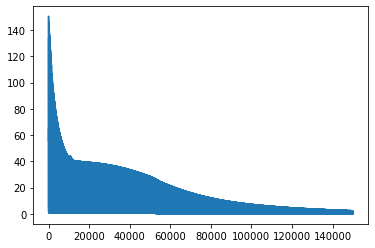

In [7]:
import random
import numpy as np

INPUT_DIM = 1
H1_DIM = 3
H2_DIM = 2
OUT_DIM = 1

def F(x):
    return 2/(1 + np.exp(-x)) - 1

def L(y_true, y_pred):
    return (y_true - y_pred)**2

def F_deriv(x):
    return F(x)*(1 - F(x))



W1 = np.random.rand(INPUT_DIM, H1_DIM)
b1 = np.random.rand(1, H1_DIM)
W2 = np.random.rand(H1_DIM, H2_DIM)
b2 = np.random.rand(1, H2_DIM)
W3 = np.random.rand(H2_DIM, OUT_DIM)
b3 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H1_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H1_DIM)
W3 = (W3 - 0.5) * 2 * np.sqrt(1/H2_DIM)
b3 = (b3 - 0.5) * 2 * np.sqrt(1/H2_DIM)

ALPHA = 0.0001
NUM_EPOCHS = 30000
BATCH_SIZE = 2

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i * BATCH_SIZE : i * BATCH_SIZE + BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = F(t1)
        t2 = h1 @ W2 + b2
        h2 = F(t2)
        t3 = h2 @ W3 + b3
        z = t3
        E = np.sum(L(z, y))

        # Backward
        dE_dt3 = z - y
        dE_dW3 = h2.T @ dE_dt3
        dE_db3 = np.sum(dE_dt3, axis=0, keepdims=True)
        
        dE_dh2 = dE_dt3 @ W3.T
        dE_dt2 = dE_dh2 * F_deriv(t2)
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)

        
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * F_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)


        # Update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2
        W3 = W3 - ALPHA * dE_dW3
        b3 = b3 - ALPHA * dE_db3

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = F(t1)
    t2 = h1 @ W2 + b2
    h2 = F(t2)
    t3 = h2 @ W3 + b3
    z = t3
    return z


def calc_mse():
    res = []
    for x, y in dataset:
        z = predict(x)
        y_pred = z
        res.append((y - y_pred)**2)
    return np.sum(res)/len(dataset)

mse = calc_mse()
print("Mean square error: ", mse)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

In [8]:
res = []
for x, y in dataset:
    z = predict(x)
    res.append({"x": x[0][0], "y_pred": z[0][0], "y": y[0]})
res = pd.DataFrame(res).set_index("x")
res

/tmp/ipykernel_7301/2905763391.py:10: RuntimeWarning: overflow encountered in exp
  return 2/(1 + np.exp(-x)) - 1


,y_pred,y
x,,
16,3.764849,4
4,1.929894,2
0,1.113944,0
49,7.148494,7
25,5.018924,5
36,6.251578,6
64,7.656640,8
1,1.180660,1
81,7.893838,9


In [ ]:
!pip install matplotlib

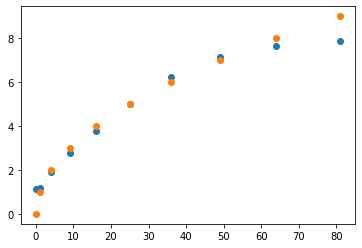

In [9]:
import matplotlib.pyplot as plt

plt.scatter(res.index, res["y_pred"])
plt.scatter(res.index, res["y"])

In [92]:
np.arange(1, 200, 0.01)

array([  1.  ,   1.01,   1.02, ..., 199.97, 199.98, 199.99])

In [96]:
n = 10
data = pd.DataFrame({
    "x": np.arange(1, 200, 0.01),
})
x_new_set = [el[None, ...] for el in data.values]
res_new = []
x_new = []
for x in x_new_set:
    res_new.append(predict(x)[0][0])
    x_new.append(x[0][0])

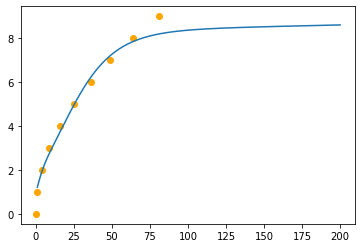

In [103]:
plt.plot(x_new, res_new)
plt.scatter(res.index, res["y"], color="orange");

In [ ]:
!pip install sklearn

In [104]:
from sklearn.datasets import load_diabetes

In [106]:
data = load_diabetes()

In [110]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [121]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [123]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [109]:
data.data.shape

(442, 10)

In [112]:
data.target.shape

(442,)

In [113]:
data.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

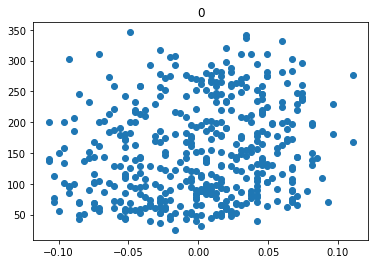

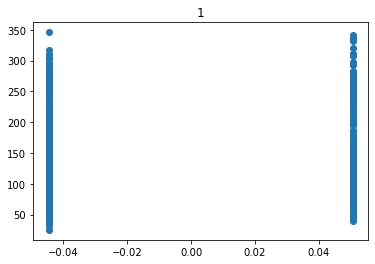

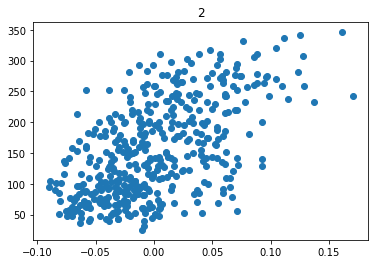

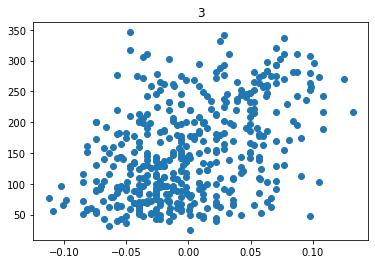

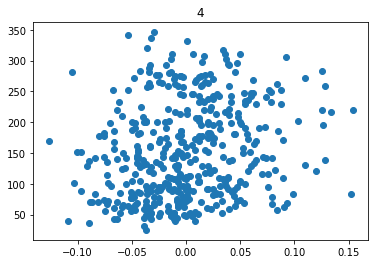

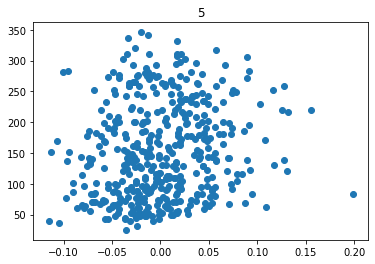

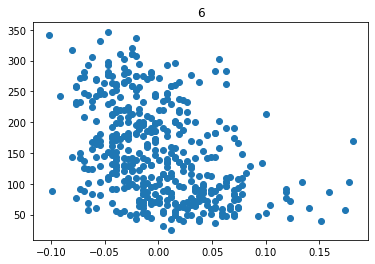

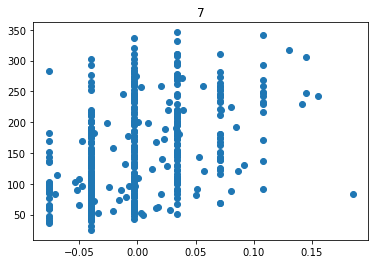

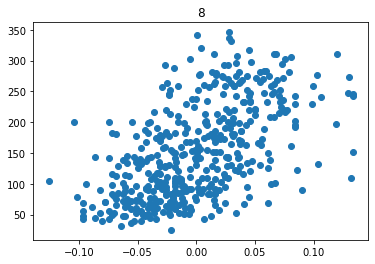

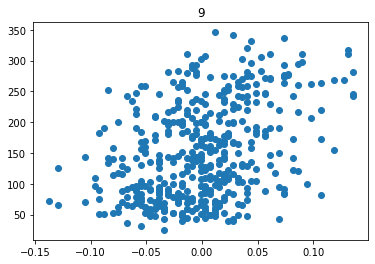

In [120]:
for i in range(10):
    plt.figure()
    plt.title(i)
    plt.scatter(data.data[:,i], data.target)

In [144]:
dataset = [(data.data[i][None, ...], data.target[i][None, ...]) for i in range(data.target.shape[0])]

In [145]:
dataset[0]

(array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
         -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613]]),
 array([151.]))

/tmp/ipykernel_77848/2599822230.py:10: RuntimeWarning: overflow encountered in exp
  return 2/(1 + np.exp(-x)) - 1


Mean square error:  5929.884907697979


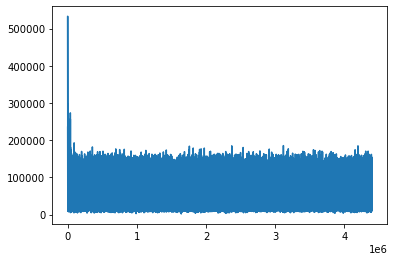

In [168]:
import random
import numpy as np

INPUT_DIM = 10
H1_DIM = 5
H2_DIM = 5
OUT_DIM = 1

def F(x):
    return 2/(1 + np.exp(-x)) - 1

def L(y_true, y_pred):
    return (y_true - y_pred)**2

def F_deriv(x):
    return F(x)*(1 - F(x))



W1 = np.random.rand(INPUT_DIM, H1_DIM)
b1 = np.random.rand(1, H1_DIM)
W2 = np.random.rand(H1_DIM, H2_DIM)
b2 = np.random.rand(1, H2_DIM)
W3 = np.random.rand(H2_DIM, OUT_DIM)
b3 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 # * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 # * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 # * np.sqrt(1/H1_DIM)
b2 = (b2 - 0.5) * 2 # * np.sqrt(1/H1_DIM)
W3 = (W3 - 0.5) * 2 # * np.sqrt(1/H2_DIM)
b3 = (b3 - 0.5) * 2 # * np.sqrt(1/H2_DIM)

ALPHA = 0.00001
NUM_EPOCHS = 10000
BATCH_SIZE = 10

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i * BATCH_SIZE : i * BATCH_SIZE + BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = F(t1)
        t2 = h1 @ W2 + b2
        h2 = F(t2)
        t3 = h2 @ W3 + b3
        z = t3
        E = np.sum(L(z, y))

        # Backward
        dE_dt3 = z - y
        dE_dW3 = h2.T @ dE_dt3
        dE_db3 = np.sum(dE_dt3, axis=0, keepdims=True)
        
        dE_dh2 = dE_dt3 @ W3.T
        dE_dt2 = dE_dh2 * F_deriv(t2)
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)

        
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * F_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)


        # Update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2
        W3 = W3 - ALPHA * dE_dW3
        b3 = b3 - ALPHA * dE_db3

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = F(t1)
    t2 = h1 @ W2 + b2
    h2 = F(t2)
    t3 = h2 @ W3 + b3
    z = t3
    return z


def calc_mse():
    res = []
    for x, y in dataset:
        z = predict(x)
        y_pred = z
        res.append((y - y_pred)**2)
    return np.sum(res)/len(dataset)

mse = calc_mse()
print("Mean square error: ", mse)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

In [165]:
W1

array([[ 4.15511947e+03,  1.48298765e-01, -2.46332053e-01,
         1.36535173e-01,  7.35008927e+01],
       [ 9.39904052e+02,  9.42664430e-01,  1.19371928e+00,
        -1.17994403e-01,  5.59615537e+01],
       [ 1.29124052e+04, -2.55285270e+00, -2.13764551e+00,
        -6.69279296e-01, -5.58006171e+01],
       [ 9.73616293e+03, -1.86340224e+00, -1.87579014e+00,
        -1.01898902e+00, -4.31777822e+01],
       [ 4.69988832e+03, -1.01360020e+00,  1.46734979e-03,
        -3.57875434e-01,  7.34824167e+01],
       [ 3.87821315e+03,  2.91176939e-01, -9.38228604e-01,
        -5.36389474e-01,  5.80702456e+01],
       [-8.73162911e+03,  2.02807219e+00,  1.48796991e+00,
         2.56159616e-01,  5.15658741e+00],
       [ 9.50060490e+03, -1.90244218e+00, -4.83770088e-01,
        -3.28078313e-01,  3.12508341e+01],
       [ 1.25062063e+04, -1.88822158e+00, -2.03906162e+00,
        -1.16320209e+00,  5.53641883e+01],
       [ 8.40559235e+03, -1.37079906e+00, -9.73065674e-01,
         4.50324940e-01

In [166]:
W2

array([[ 6.30406422e-01, -6.16921468e-02, -2.88789912e-03,
        -2.95155471e-02,  1.19434111e+00],
       [ 2.65683653e+00, -3.32939116e+00,  1.27673810e+00,
        -4.58242140e-01, -5.49853005e+03],
       [ 3.09895888e+00, -2.57492776e+00,  7.31555288e-01,
         3.84277837e-01, -5.49762230e+03],
       [ 1.77746640e+00,  1.41521876e-01, -1.14124255e-01,
        -7.41204475e-01, -5.48643255e+03],
       [ 8.47629729e-02,  3.97862352e+00, -1.79862053e+00,
         4.30711605e-01, -5.48706565e+03]])

In [167]:
W3

array([[46.1580506 ],
       [-1.59790915],
       [-2.49787445],
       [-1.08453676],
       [26.52231305]])

# Задача классификации

In [169]:
from sklearn import datasets
iris = datasets.load_iris()
dataset = [(iris.data[i][None, ...], iris.target[i]) for i in range(len(iris.target))]

In [172]:
iris.data.shape

(150, 4)

In [178]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [174]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [175]:
set(iris.target)

{0, 1, 2}

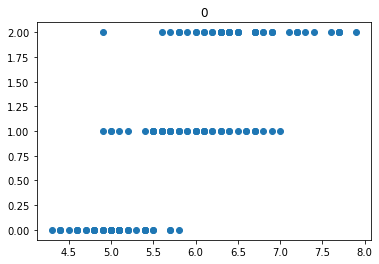

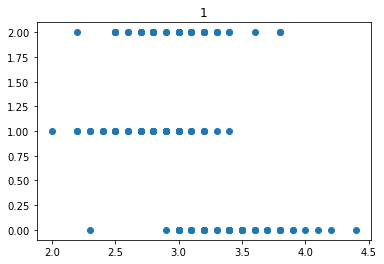

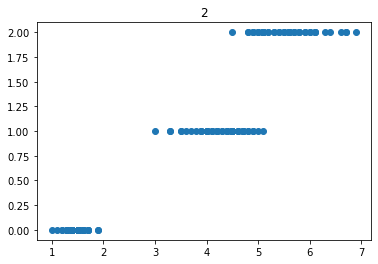

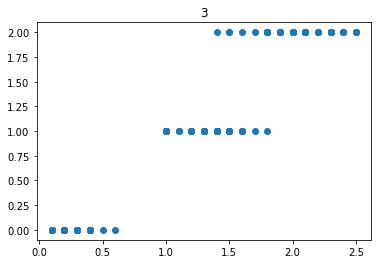

In [180]:
for i in range(4):
    plt.figure()
    plt.title(i)
    plt.scatter(iris.data[:,i], iris.target)

Accuracy: 0.96


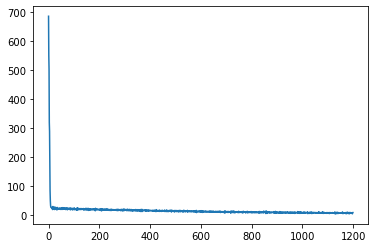

In [170]:
INPUT_DIM = 4
OUT_DIM = 3
H_DIM = 10

def relu(t):
    return np.maximum(t, 0)

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)

def sparse_cross_entropy(z, y):
    return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
    return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def to_full(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full

def relu_deriv(t):
    return (t >= 0).astype(float)


W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 # * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 # * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 # * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 # * np.sqrt(1/H_DIM)

ALPHA = 0.0002
NUM_EPOCHS = 400
BATCH_SIZE = 50

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        # Backward
        y_full = to_full_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax_batch(t2)
    return z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

In [185]:
from sklearn import datasets
digits = datasets.load_digits()
dataset = [(digits.data[i][None, ...], digits.target[i]) for i in range(len(digits.target))]

In [186]:
digits.data.shape

(1797, 64)

In [189]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [190]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [191]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [212]:
digits.data.max()

16.0

3


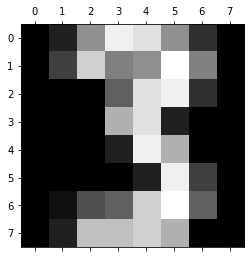

In [211]:
i = 13
print(digits.target[i])
plt.matshow(digits.data[i].reshape(8, 8), cmap=plt.cm.gray);

Accuracy: 0.8653311074012242


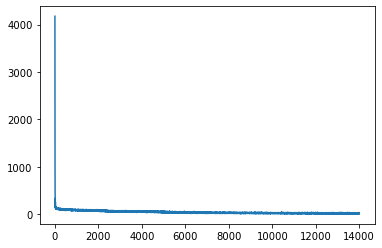

In [188]:
INPUT_DIM = 64
OUT_DIM = 10
H_DIM = 10

def relu(t):
    return np.maximum(t, 0)

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)

def sparse_cross_entropy(z, y):
    return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
    return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))

def to_full(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full

def relu_deriv(t):
    return (t >= 0).astype(float)


W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

W1 = (W1 - 0.5) * 2 # * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 # * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 # * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 # * np.sqrt(1/H_DIM)

ALPHA = 0.0002
NUM_EPOCHS = 400
BATCH_SIZE = 50

loss_arr = []

for ep in range(NUM_EPOCHS):
    random.shuffle(dataset)
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        # Backward
        y_full = to_full_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Update
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

def predict(x):
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax_batch(t2)
    return z

def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()

In [247]:
x = np.array([[0, 0, 16, 16, 16,  16, 0, 0, 
               0, 16,  0,  0,  0,  0, 0, 0,
               0, 16,  0,  0,  0,  0, 0, 0,
               0, 16, 16, 16, 16, 0, 0, 0,
               0,  0,  0,  0,  0, 16, 0, 0,
               0,  0,  0,  0,  0, 16, 0, 0,
               0, 16,  0,  0, 16,  0, 0, 0,
               0,  0, 16, 16,  0,  0, 0, 0]])

In [248]:
predict(x)

array([[2.27674865e-24, 8.46751825e-28, 4.03037278e-19, 6.94703464e-33,
        1.71679776e-33, 1.00000000e+00, 9.88597822e-40, 2.82746444e-20,
        1.02937324e-26, 6.95208379e-30]])

In [249]:
np.argmax(predict(x))

5